In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

## Load flowers dataset

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('./flowers',
    validation_split=0.2,
    subset="training",
    image_size=(64,64),
    seed=123,
    batch_size=32)

test_ds = tf.keras.preprocessing.image_dataset_from_directory('./flowers',
    validation_split=0.2,
    subset="validation",
    image_size=(64,64),
    seed=123,
    batch_size=32)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [4]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


## Show examples

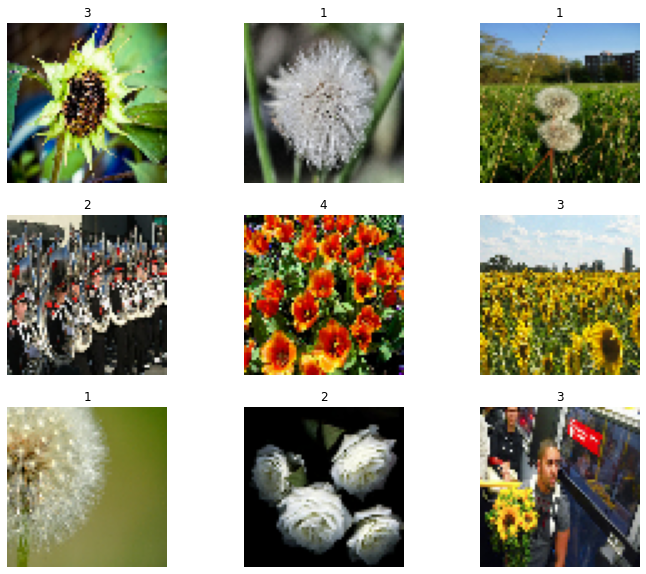

In [5]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(12, 10))
for samples, labels in train_ds.take(1):
    samples = samples.numpy()
    labels = labels.numpy()
    for i in range(9):
        n = random.randrange(len(samples))
        plt.subplot(3, 3, i + 1)
        plt.imshow(samples[n])
        plt.title(labels[n])
        plt.axis("off")

## Create a CNN model

In [5]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dense(5))
model.add(Activation("softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [7]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [8]:
H = model.fit(train_ds, epochs=10, validation_data=test_ds,
             callbacks=[tensorboard_callback]
             )    

Epoch 1/10
 1/92 [..............................] - ETA: 0s - loss: 1.7405 - accuracy: 0.0312WARNING:tensorflow:From C:\programs\miniconda3\envs\deep\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
92/92 [==============================] - 23s 248ms/step - loss: 1.3772 - accuracy: 0.4050 - val_loss: 1.1371 - val_accuracy: 0.5627
Epoch 2/10
92/92 [==============================] - 18s 191ms/step - loss: 1.0649 - accuracy: 0.5804 - val_loss: 1.1286 - val_accuracy: 0.5409
Epoch 3/10
92/92 [==============================] - 20s 217ms/step - loss: 0.9556 - accuracy: 0.6298 - val_loss: 0.9740 - val_accuracy: 0.6213
Epoch 4/10
92/92 [==============================] - 18s 200ms/step - loss: 0.8444 - accuracy: 0.6812 - val_loss: 0.9683 - val_accuracy: 0.6185
Epoch 5/10
92/92 [==============================] - 17s 

In [58]:
model.save('flowers_model')

INFO:tensorflow:Assets written to: flowers_model\assets
